In [1]:
import glob
import librosa
import numpy as np
import scipy as sp
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [2]:
ipd.Audio('data/sample-000007.mp3')

# load one audio

In [2]:
audio_path = 'data/sample-000007.mp3'
sr = 44100  #sample rate
signal, sr = librosa.load(audio_path, sr=sr)

# load several audios

In [4]:
def get_signals(path):
    audios_path = glob.glob(path + "/*.mp3")
    results = [librosa.load(audio) for audio in audios_path]
    return results

# plot waveform

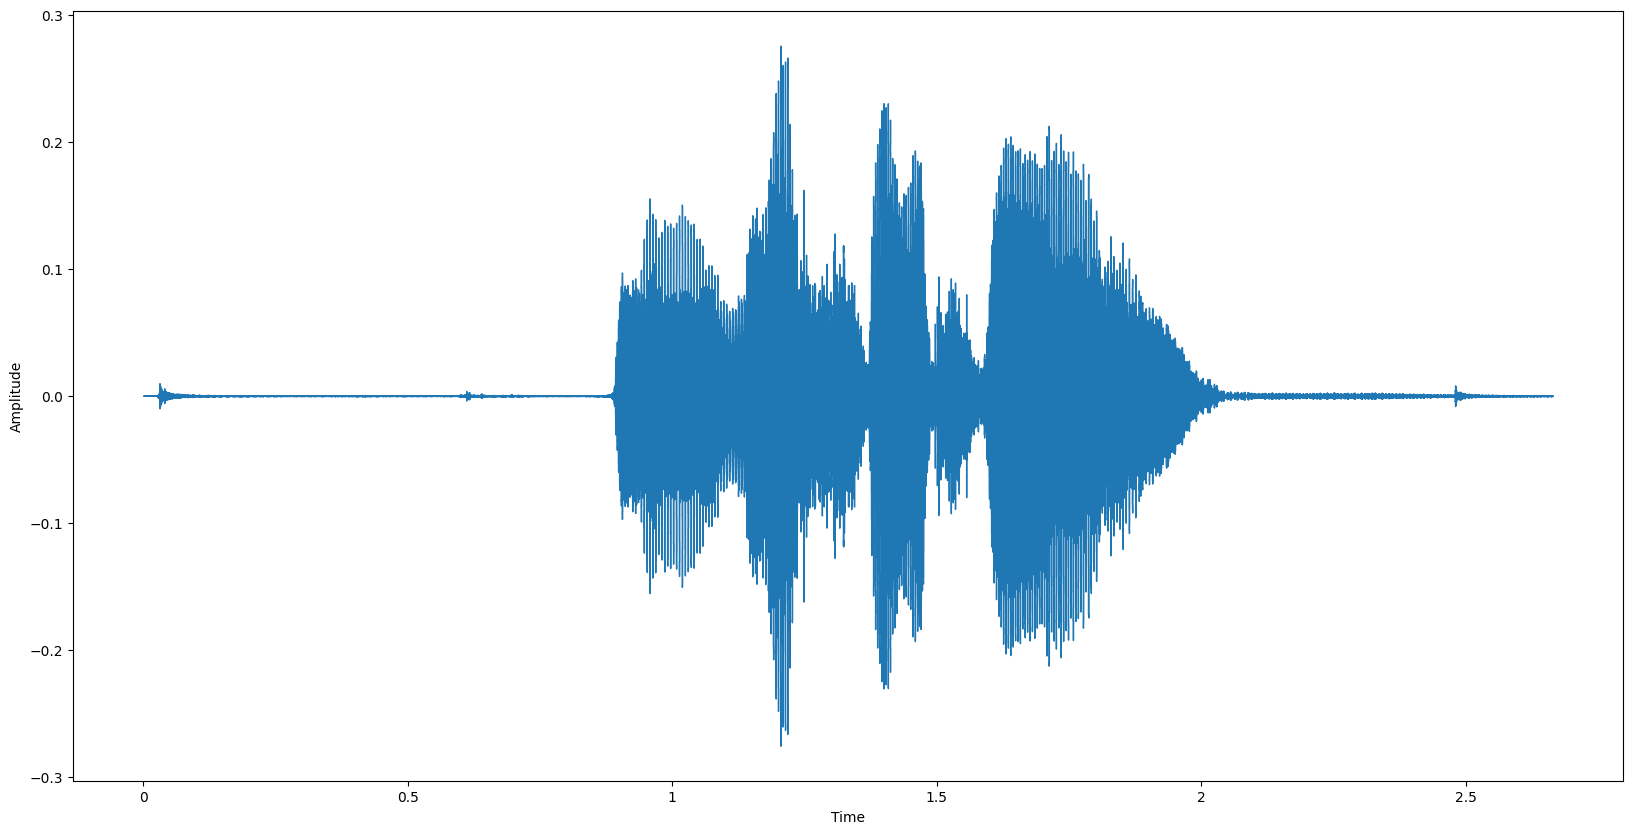

In [16]:
plt.figure(figsize=(20, 10))
librosa.display.waveshow(y=signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# FFT

In [17]:
fft = sp.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

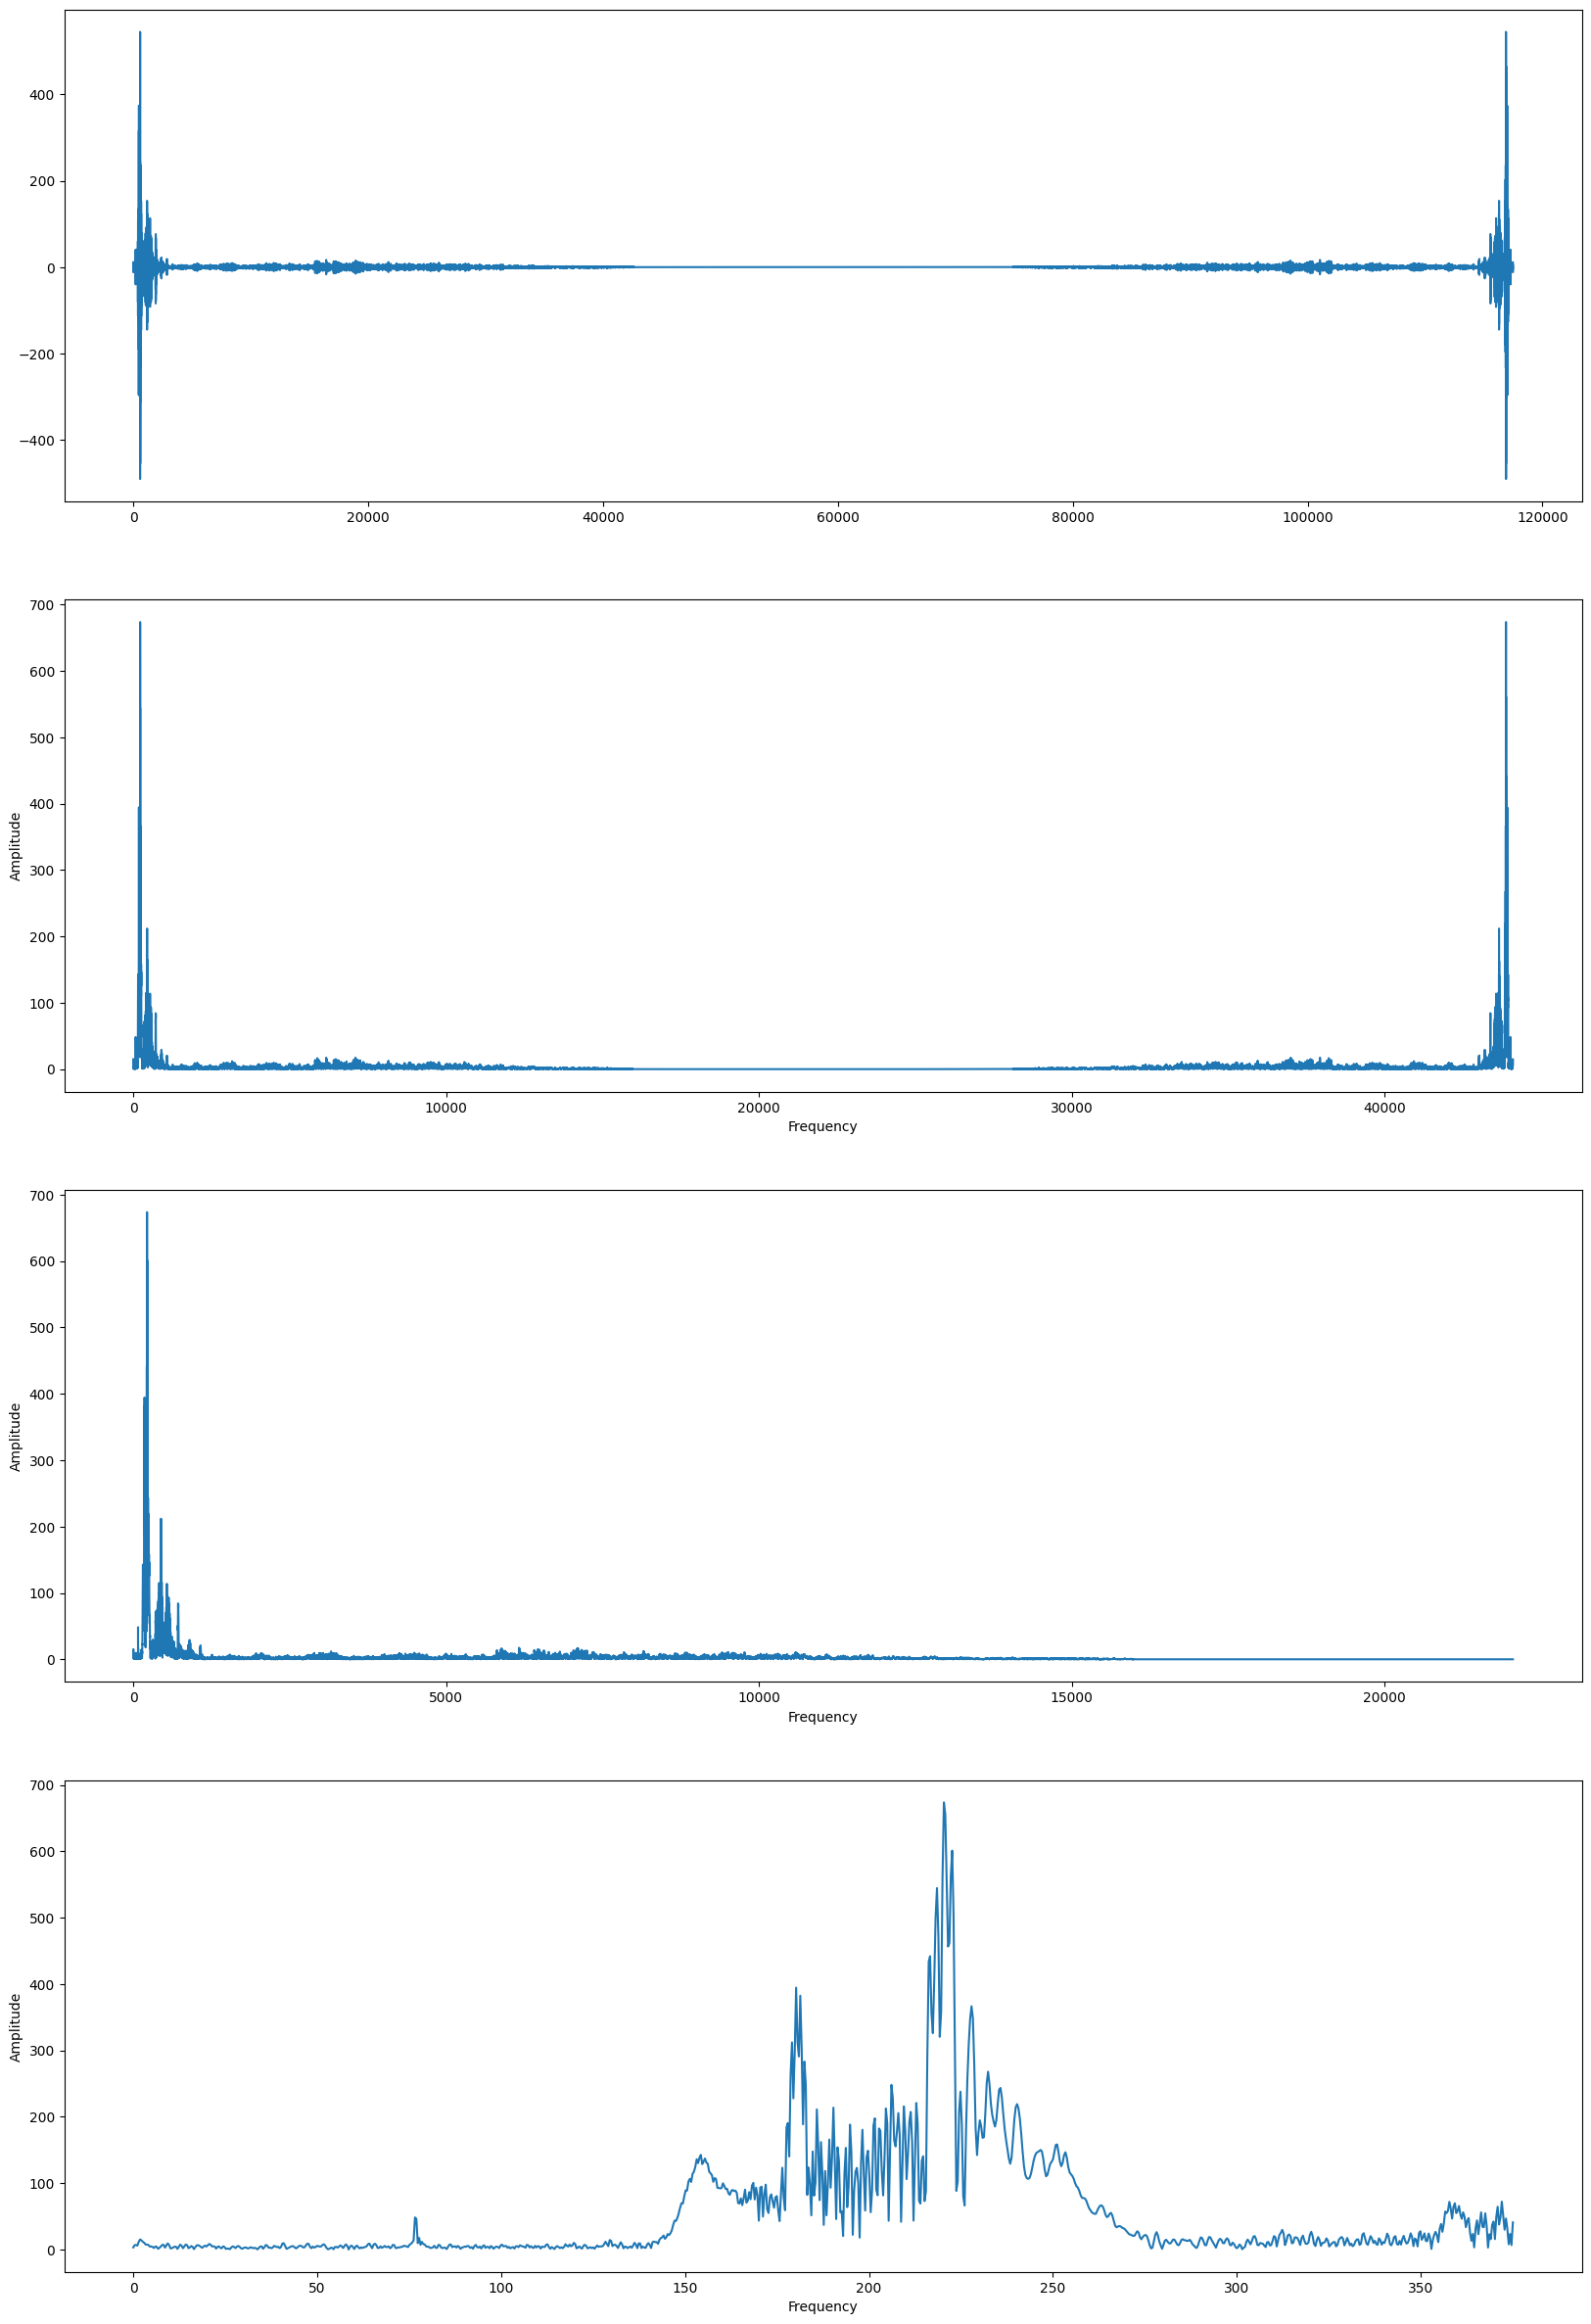

In [29]:
fig = plt.figure(figsize=(20, 30))
r, c = 4, 1

fig.add_subplot(r, c, 1)
plt.plot(fft)

fig.add_subplot(r, c, 2)
plt.plot(frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

fig.add_subplot(r, c, 3)
plt.plot(frequency[:int(len(frequency) / 2)], magnitude[:int(len(magnitude) / 2)])
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

fig.add_subplot(r, c, 4)
plt.plot(frequency[:1000], magnitude[:1000])
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.show()

# Example Of Superimposing Pure Signals

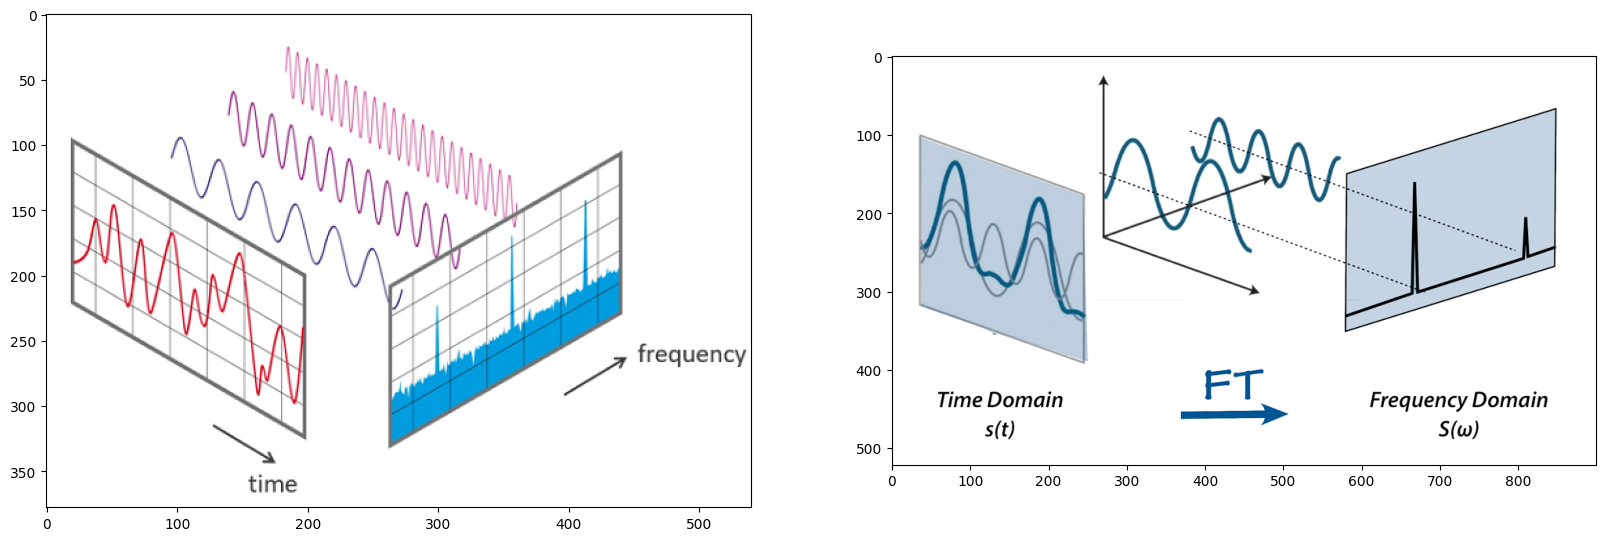

In [12]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(plt.imread('data/1.png'))
plt.subplot(1, 2, 2)
plt.imshow(plt.imread('data/2.webp'))
plt.show()

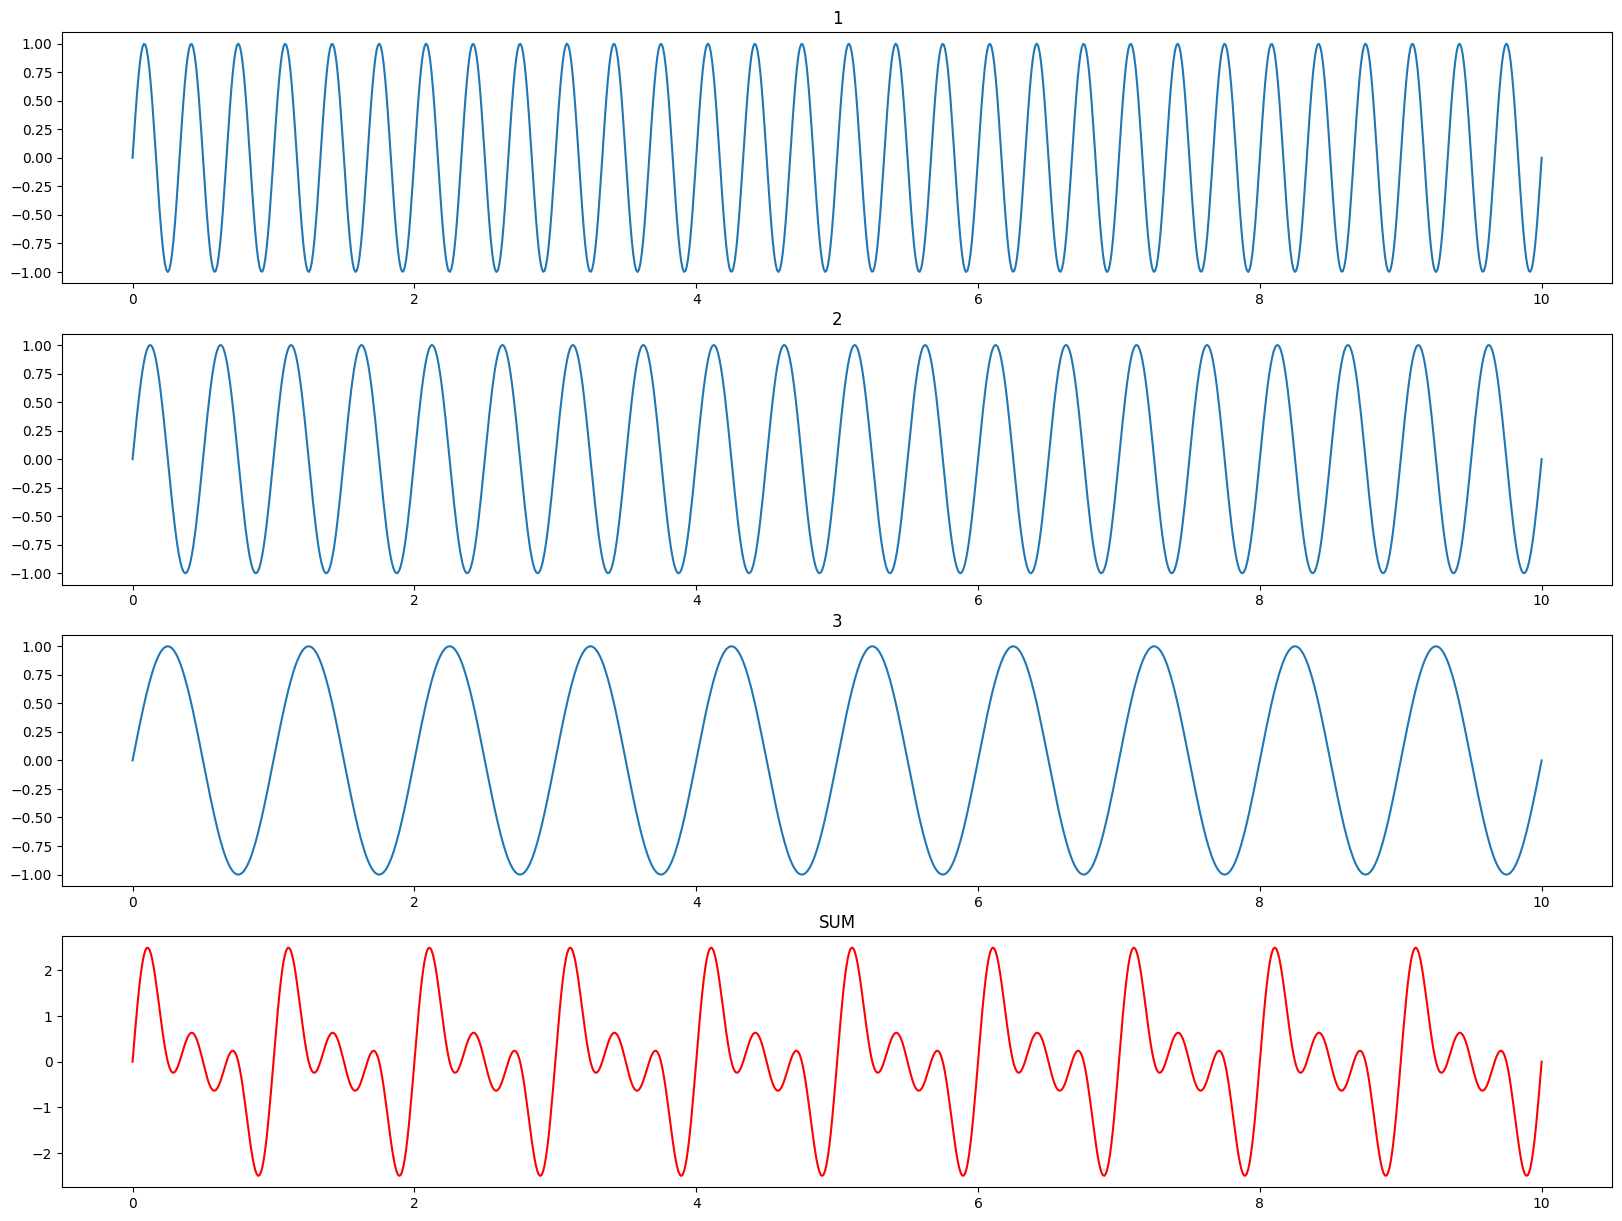

In [38]:
time = np.linspace(0, 10, 1000)
r, c = 4, 1

sin = np.sin(2 * np.pi * (1 * time))
sin2 = np.sin(2 * np.pi * (2 * time))
sin3 = np.sin(2 * np.pi * (3 * time))

sum_signal = sin + sin2 + sin3

plt.figure(figsize=(20, 15))

plt.subplot(r, c, 1)
plt.plot(time, sin3)
plt.title('1')

plt.subplot(r, c, 2)
plt.plot(time, sin2)
plt.title('2')

plt.subplot(r, c, 3)
plt.plot(time, sin)
plt.title('3')

plt.subplot(r, c, 4)
plt.plot(time, sum_signal, color="r")
plt.title('SUM')

plt.show()

# Spectrogram

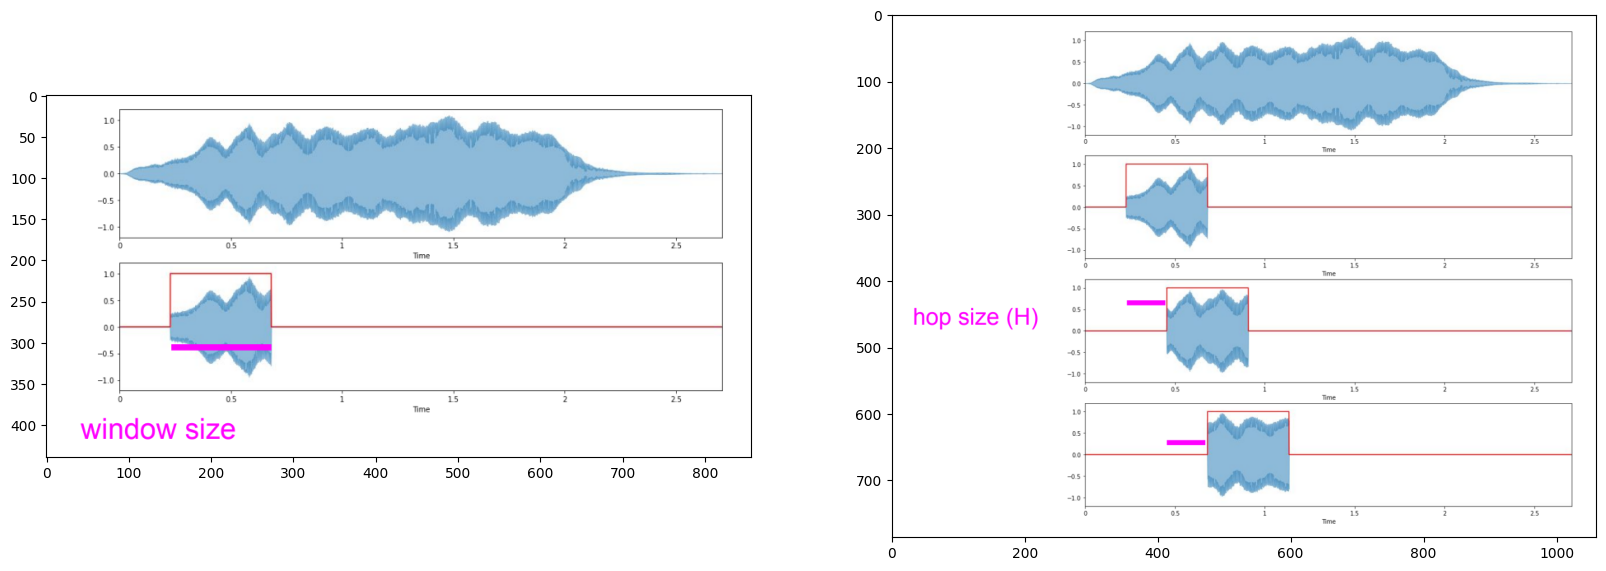

In [35]:
plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.imshow(plt.imread('data/3.png'))
plt.subplot(1, 2, 2)
plt.imshow(plt.imread('data/4.png'))
plt.show()

In [3]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [6]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    librosa.display.specshow(Y, sr=sr, hop_length=hop_length, x_axis="time", y_axis=y_axis)
    plt.colorbar()

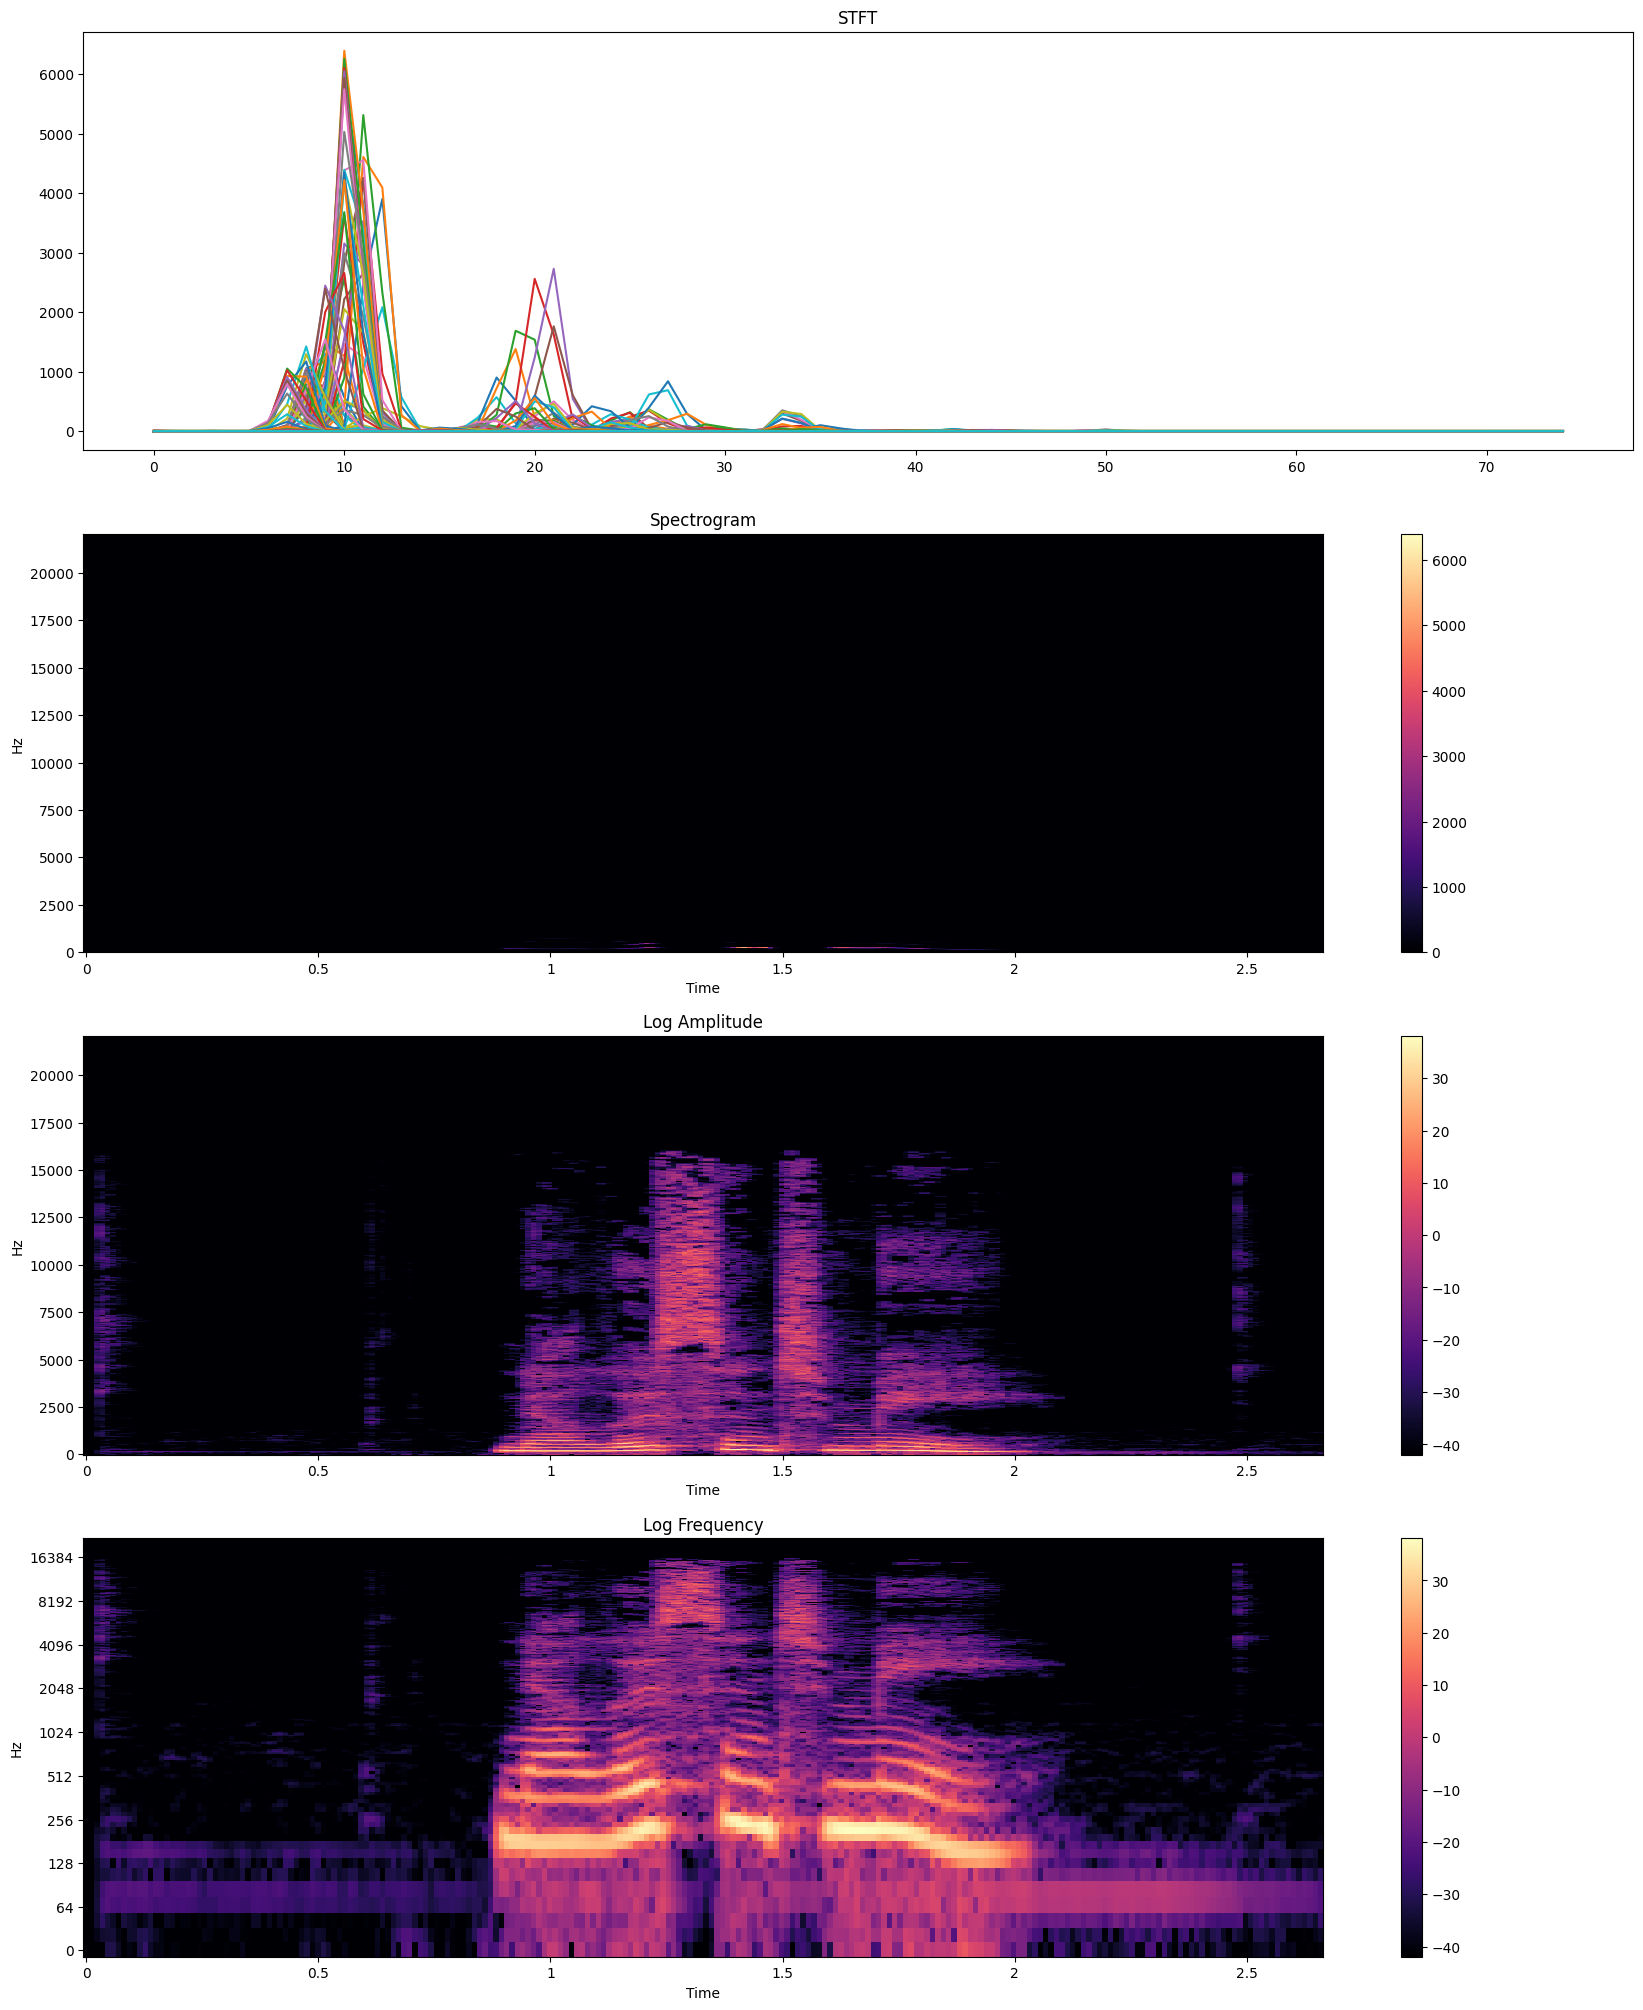

In [23]:
fig = plt.figure(figsize=(20, 25))
r, c = 4, 1

fig.add_subplot(r, c, 1)
stft = librosa.stft(signal, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
stft = np.abs(stft) ** 2
plt.plot(stft[:75])
plt.title('STFT')

fig.add_subplot(r, c, 2)
plot_spectrogram(stft, sr, HOP_SIZE)
plt.title('Spectrogram')

fig.add_subplot(r, c, 3)
log_stft = librosa.power_to_db(stft)
plot_spectrogram(log_stft, sr, HOP_SIZE)
plt.title('Log Amplitude')

fig.add_subplot(r, c, 4)
plot_spectrogram(log_stft, sr, HOP_SIZE, y_axis="log")
plt.title('Log Frequency')

plt.show()